In [2]:
!pip install opendatasets
!pip install pandas

In [4]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/s3programmer/flood-risk-in-india/data")

Dataset URL: https://www.kaggle.com/datasets/s3programmer/flood-risk-in-india


In [24]:
import opendatasets as od
import pandas

od.download(
    "https://source.coop/esa/sen12flood")

8192it [00:00, 105979.23it/s]


In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


import os
for dirname, _, filenames in os.walk('/content/flood-risk-in-india'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/flood-risk-in-india/flood_risk_dataset_india.csv


In [9]:
df=pd.read_csv('/content/flood-risk-in-india/flood_risk_dataset_india.csv')
df.head()

,Latitude,Longitude,Rainfall (mm),Temperature (°C),Humidity (%),River Discharge (m³/s),Water Level (m),Elevation (m),Land Cover,Soil Type,Population Density,Infrastructure,Historical Floods,Flood Occurred
0,18.861663,78.835584,218.999493,34.144337,43.912963,4236.182888,7.415552,377.465433,Water Body,Clay,7276.742184,1,0,1
1,35.570715,77.654451,55.353599,28.778774,27.585422,2472.585219,8.811019,7330.608875,Forest,Peat,6897.736956,0,1,0
2,29.227824,73.108463,103.991908,43.934956,30.108738,977.328053,4.631799,2205.873488,Agricultural,Loam,4361.518494,1,1,1
3,25.361096,85.610733,198.984191,21.569354,34.453690,3683.208933,2.891787,2512.277800,Desert,Sandy,6163.069701,1,1,0
4,12.524541,81.822101,144.626803,32.635692,36.292267,2093.390678,3.188466,2001.818223,Agricultural,Loam,6167.964591,1,0,0


In [10]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Rainfall (mm),0
Temperature (°C),0
Humidity (%),0
River Discharge (m³/s),0
Water Level (m),0
Elevation (m),0
Land Cover,0
Soil Type,0


<Axes: title={'center': 'Correlation Map'}>

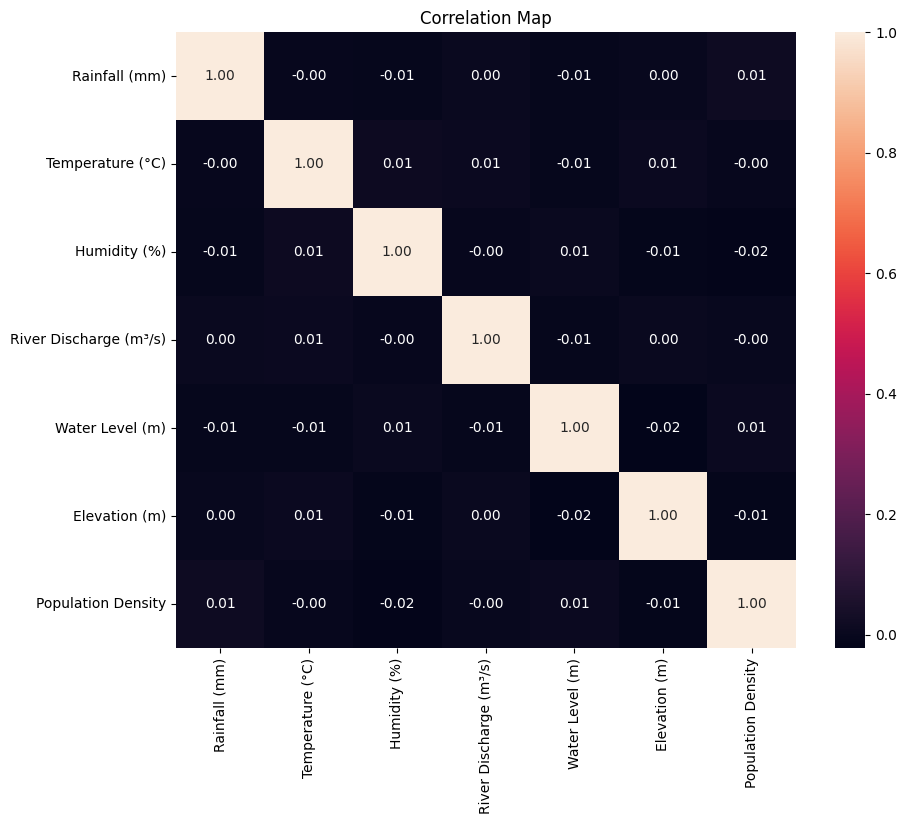

In [14]:
number = df[['Rainfall (mm)','Temperature (°C)','Humidity (%)','River Discharge (m³/s)','Water Level (m)','Elevation (m)','Population Density']]
plt.figure(figsize=(10,8))
plt.title("Correlation Map")
sns.heatmap(number.corr(),annot=True, fmt='.2f')

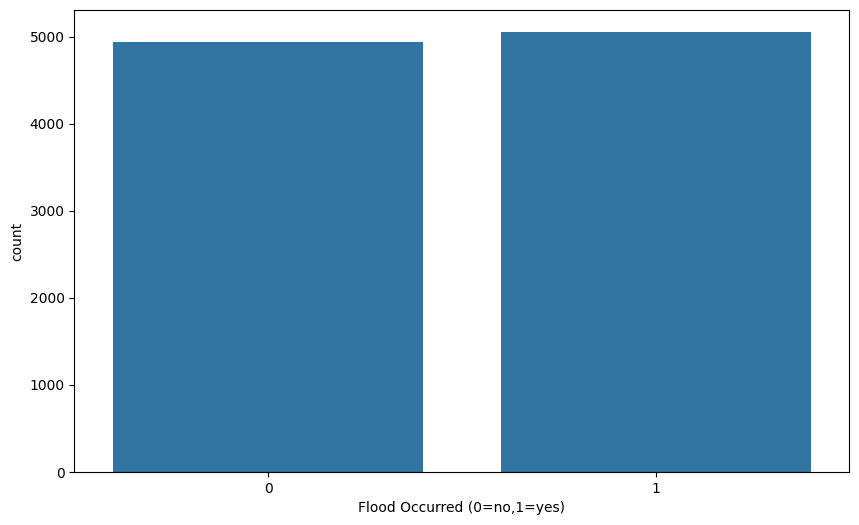

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='Flood Occurred',data=df)
plt.xlabel('Flood Occurred (0=no,1=yes)')
plt.show()

Accuracy: 0.5145
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       966
           1       0.53      0.53      0.53      1034

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



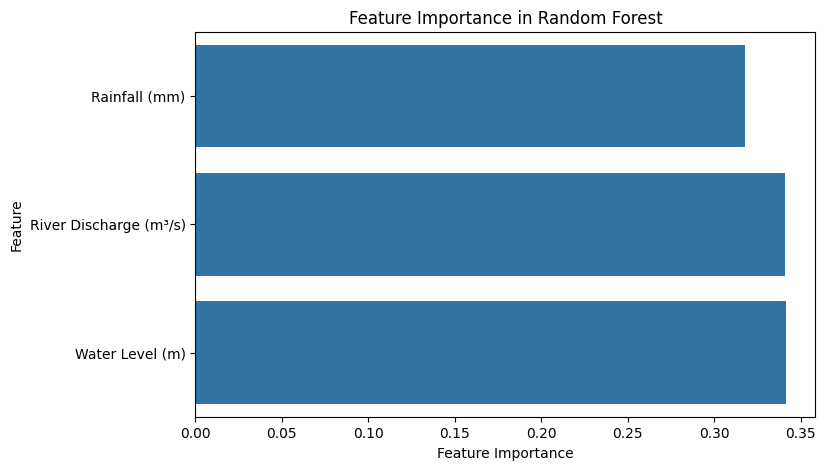

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
df = df  # Update with actual file path

# Drop columns with very low correlation
selected_features = ["Rainfall (mm)", "River Discharge (m³/s)", "Water Level (m)"]
X = df[selected_features]
y = df["Flood Occurred"]  # Update with the actual target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance Plot
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=selected_features)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()


In [20]:
print("Map Of All Places Where Floods Occured and The Precipitation is Higher Than 200 mm")
precipitation_threshold = 200

high_precipitation_data = df[(df['Rainfall (mm)'] > precipitation_threshold) & (df['Flood Occurred'] == 1)]


map_center = [high_precipitation_data['Latitude'].mean(), high_precipitation_data['Longitude'].mean()]
my_map = folium.Map(location=map_center, zoom_start=5)

marker_cluster = MarkerCluster().add_to(my_map)

for _, row in high_precipitation_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Rainfall: {row['Rainfall (mm)']} mm, Temp: {row['Temperature (°C)']} °C, Humidity: {row['Humidity (%)']}%, Water Level: {row['Water Level (m)']}, Elevation: {row['Elevation (m)']}"
    ).add_to(marker_cluster)

my_map

Map Of All Places Where Floods Occured and The Precipitation is Higher Than 200 mm
